In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics as sklm

## Анализ feeding_tasks
Поделал всякое

In [3]:
df_2022 = pd.read_csv("2022-feeding-tasks.csv", sep=None, engine="python", encoding="utf-8", decimal=",", thousands=".", on_bad_lines="skip")
df_2023 = pd.read_csv("2023-feeding-tasks.csv", sep=None, engine="python", encoding="utf-8", decimal=",", thousands=".", on_bad_lines="skip")
df_2024 = pd.read_csv("2024-feeding-tasks.csv", sep=None, engine="python", encoding="utf-8", decimal=",", thousands=".", on_bad_lines="skip")
df_2025 = pd.read_csv("2025-feeding-tasks.csv", sep=None, engine="python", encoding="utf-8", decimal=",", thousands=".", on_bad_lines="skip")

In [4]:
df_2022_det = pd.read_csv("2022-feeding-tasks-details.csv", sep=None, engine="python", encoding="utf-8", decimal=",", thousands=".", on_bad_lines="skip")
df_2023_det = pd.read_csv("2023-feeding-tasks-details.csv", sep=None, engine="python", encoding="utf-8", decimal=",", thousands=".", on_bad_lines="skip")
df_2024_det = pd.read_csv("2024-feeding-tasks-details.csv", sep=None, engine="python", encoding="utf-8", decimal=",", thousands=".", on_bad_lines="skip")
df_2025_det = pd.read_csv("2025-feeding-tasks-details.csv", sep=None, engine="python", encoding="utf-8", decimal=",", thousands=".", on_bad_lines="skip")

In [5]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274479 entries, 0 to 274478
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   FeedingTaskID                274479 non-null  object
 1   Date                         274479 non-null  object
 2   FarmName                     274479 non-null  object
 3   FeedNumber                   274479 non-null  int64 
 4   SectionID                    274479 non-null  int64 
 5   PhysiologicalGroupID         274479 non-null  int64 
 6   PhysiologicalGroupName       274479 non-null  object
 7   PhysiologicalGroupHeadCount  274479 non-null  int64 
 8   Appetite                     274479 non-null  int64 
 9   RationName                   274479 non-null  object
 10  RationPart                   274479 non-null  int64 
 11  TotalWeight_kg               274479 non-null  int64 
 12  CompletedAt                  274333 non-null  object
dtypes: int64(7), o

In [6]:
df_2022_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222285 entries, 0 to 2222284
Data columns (total 8 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   FeedingTaskID           object
 1   SectionID               int64 
 2   PhysiologicalGroupID    int64 
 3   PhysiologicalGroupName  object
 4   IngredientID            int64 
 5   IngredientName          object
 6   IngredientType          object
 7   PhysicalWeight_kg       int64 
dtypes: int64(4), object(4)
memory usage: 135.6+ MB


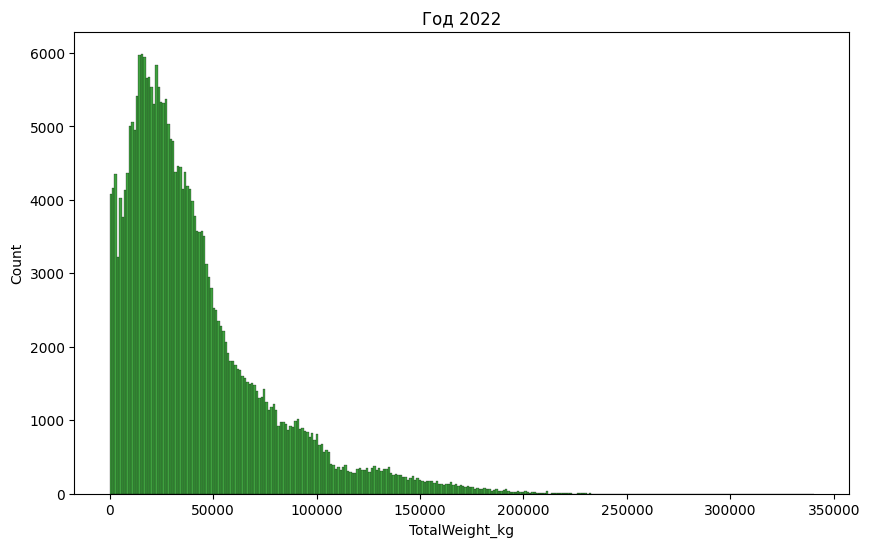

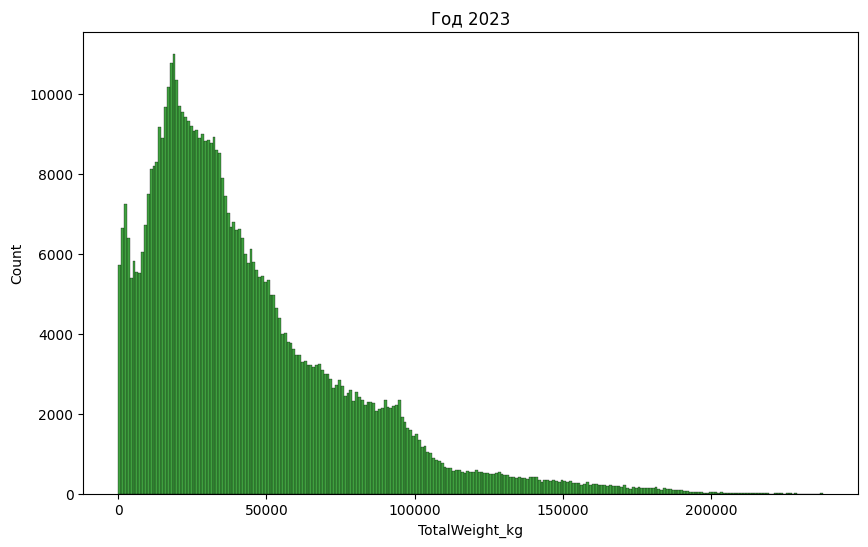

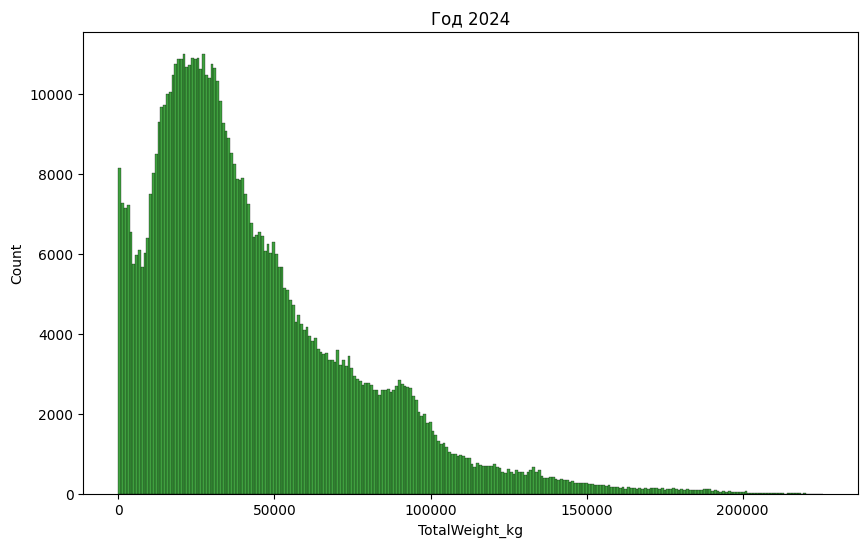

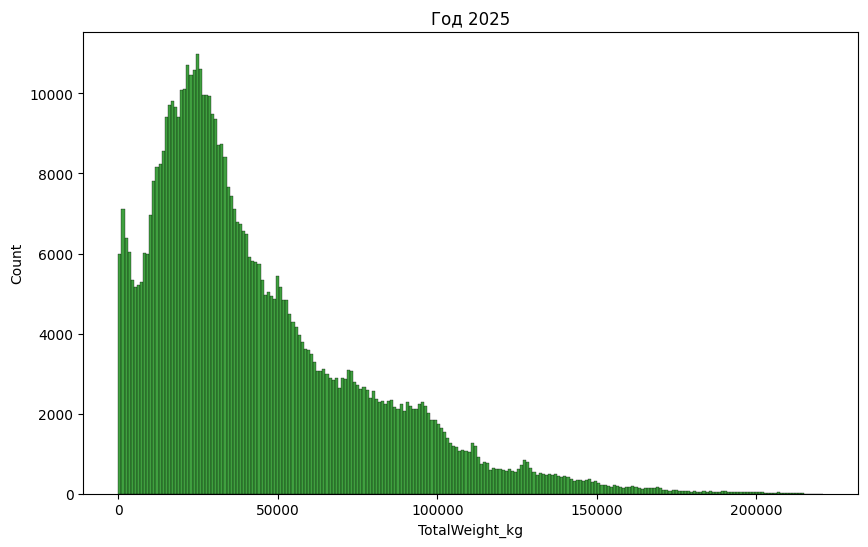

In [7]:
for i in range(2022, 2026):
    fig, axes = plt.subplots(1,1,figsize=(10,6))
    axes.set_title(f"Год {i}")
    sns.histplot(data=globals()[f"df_{i}"], x='TotalWeight_kg', color="green")

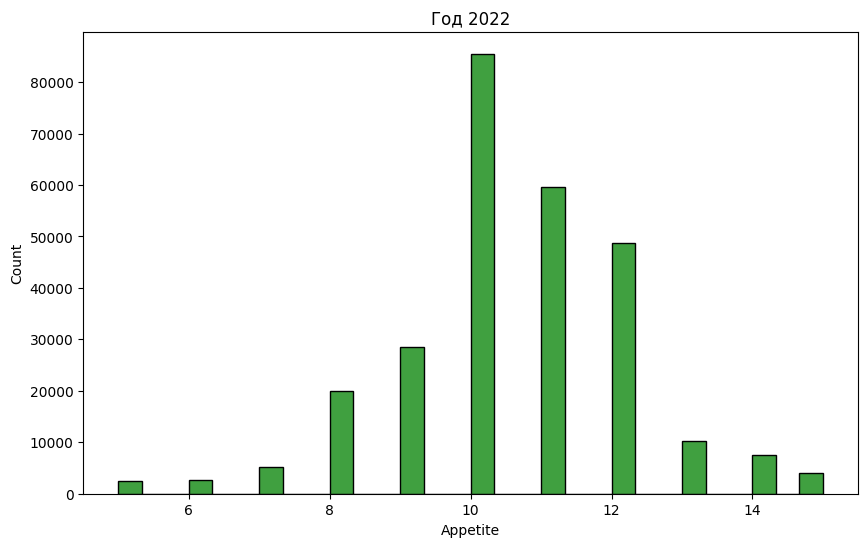

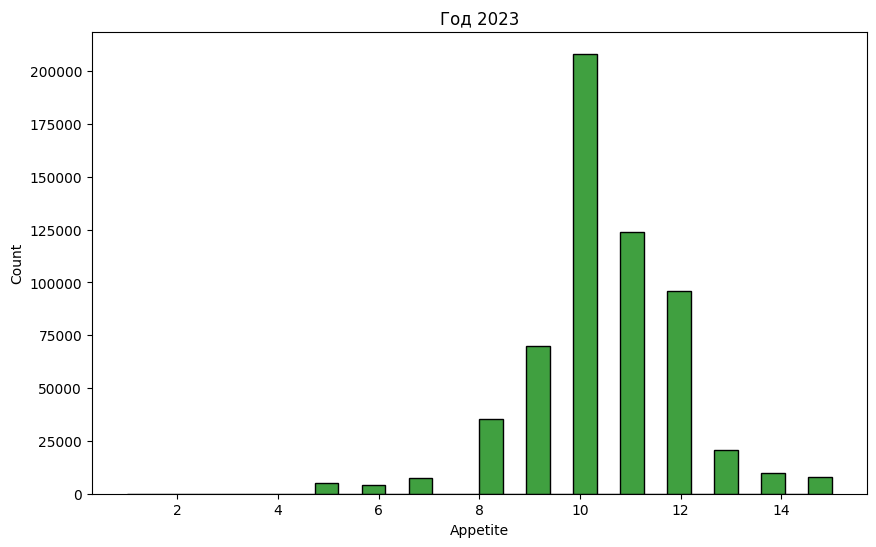

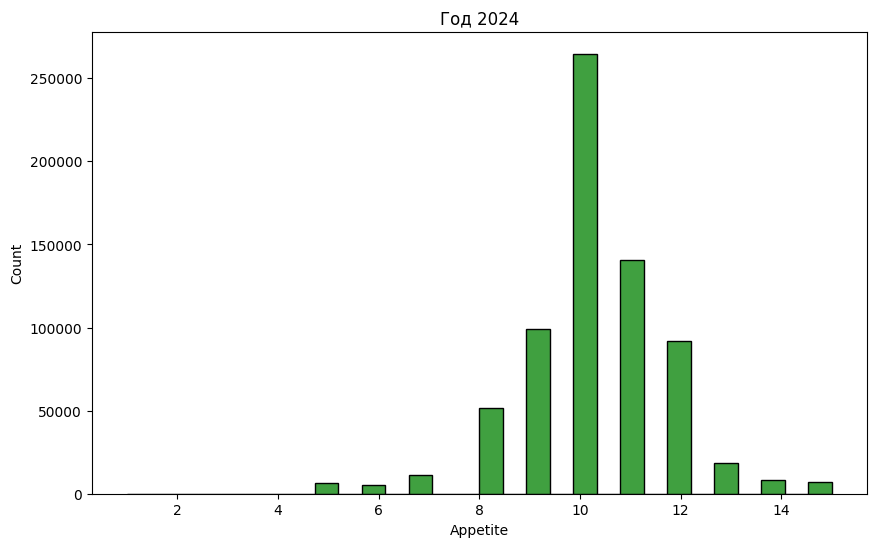

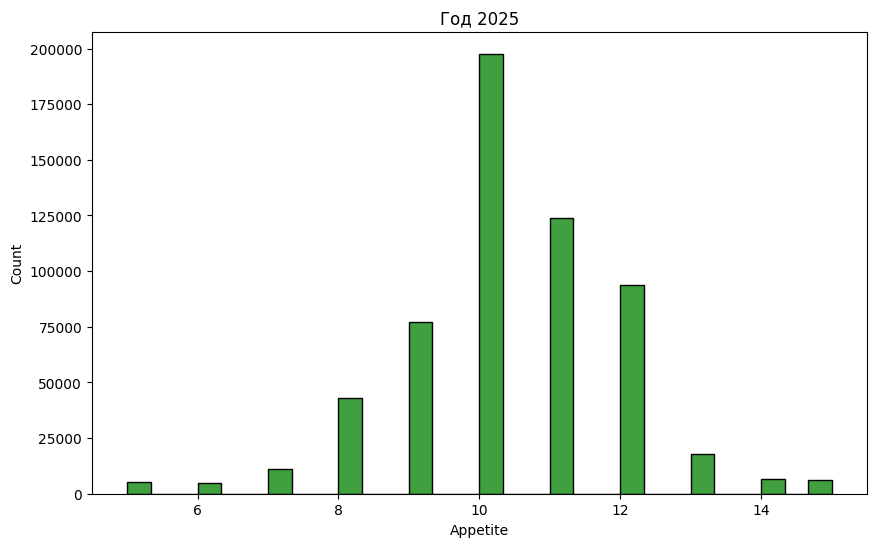

In [8]:
for i in range(2022, 2026):
    fig, axes = plt.subplots(1,1,figsize=(10,6))
    axes.set_title(f"Год {i}")
    sns.histplot(data=globals()[f"df_{i}"], x='Appetite', bins=30, color="green")

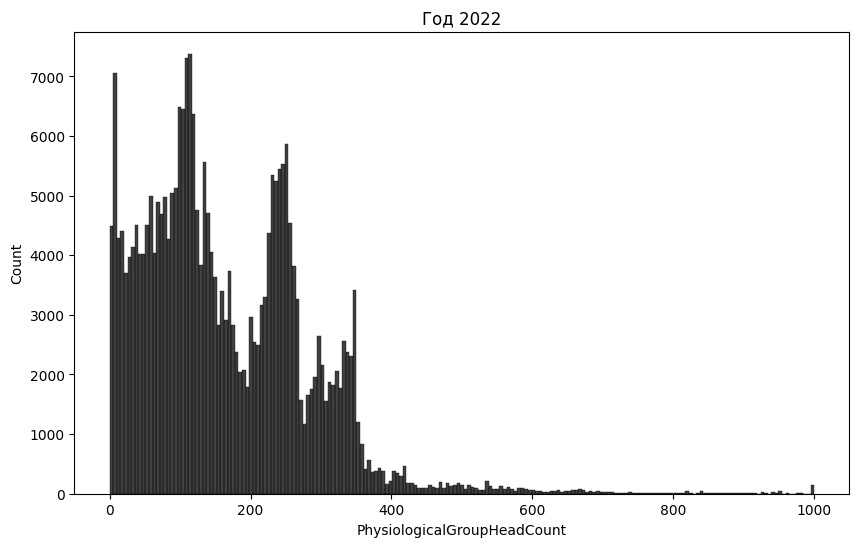

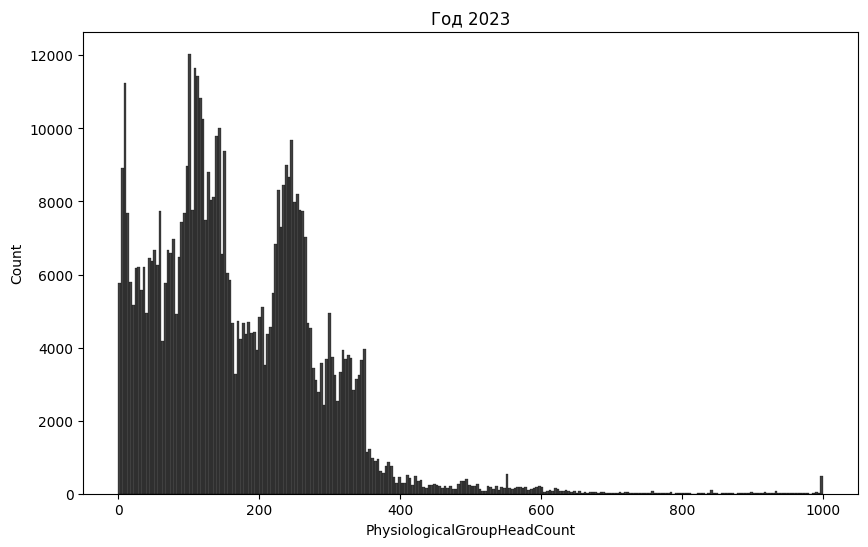

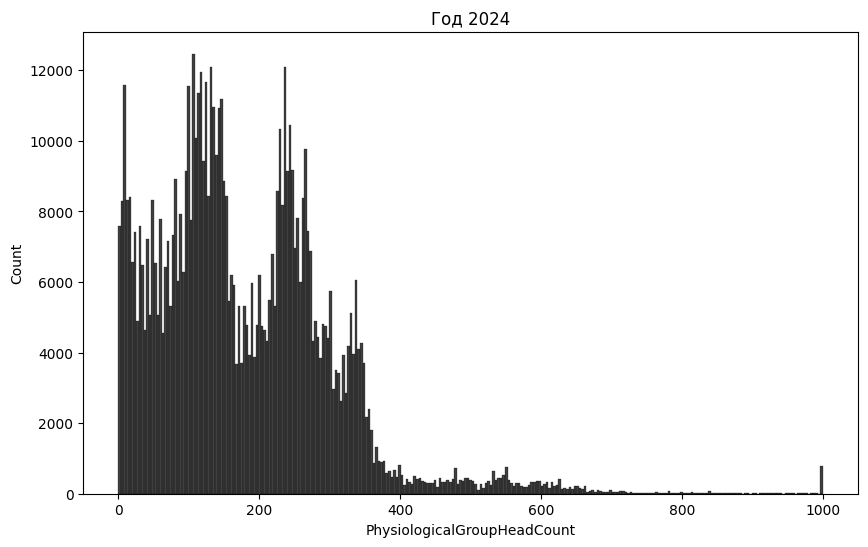

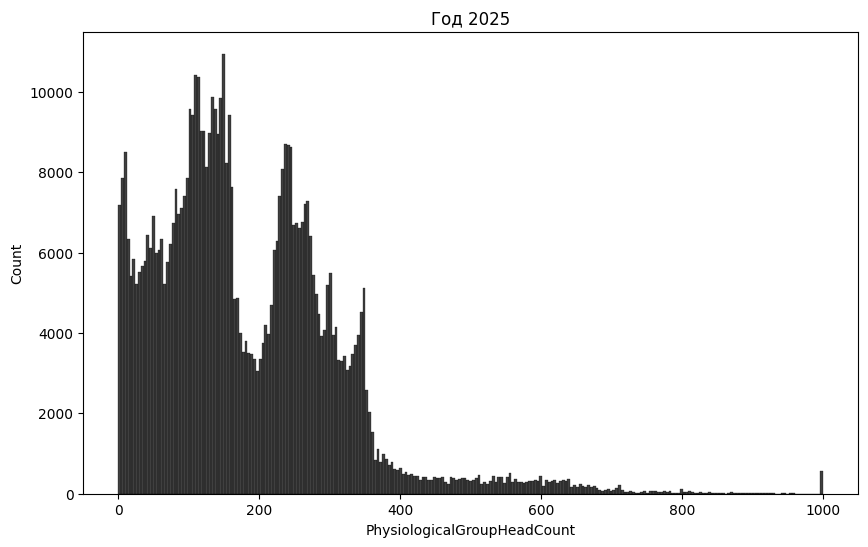

In [14]:
for i in range(2022, 2026):
    fig, axes = plt.subplots(1,1,figsize=(10,6))
    axes.set_title(f"Год {i}")
    sns.histplot(data=globals()[f"df_{i}"], x = 'PhysiologicalGroupHeadCount', color="black")

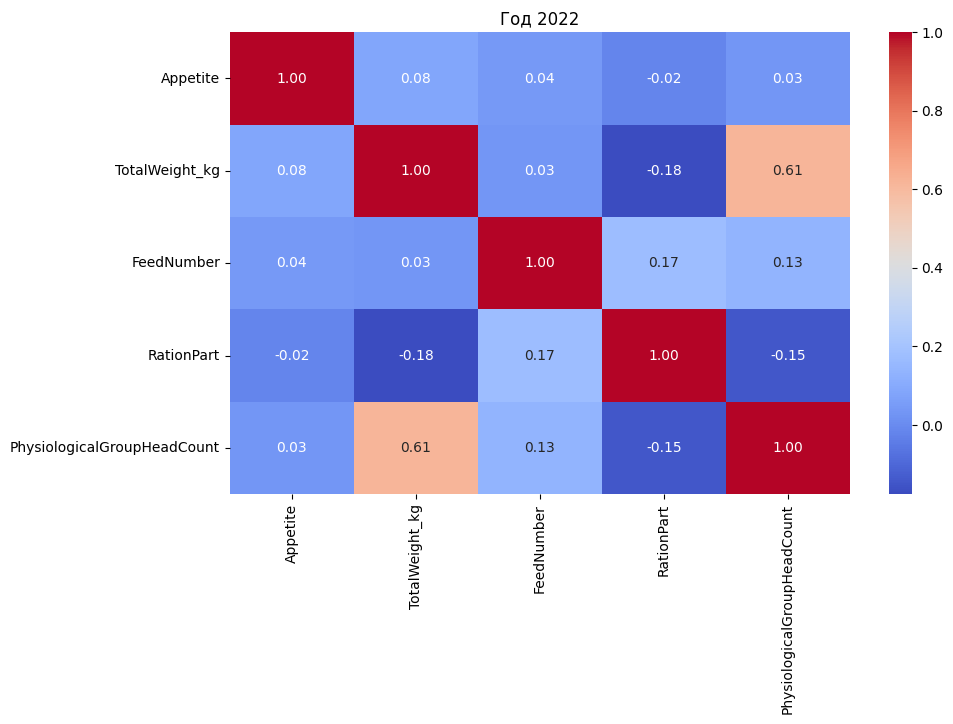

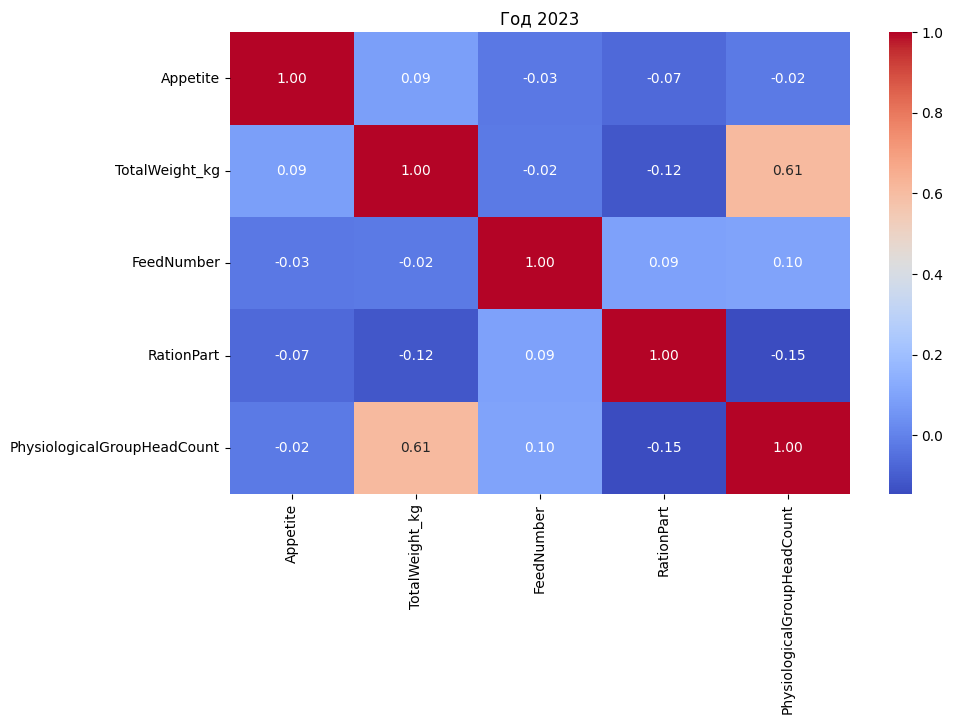

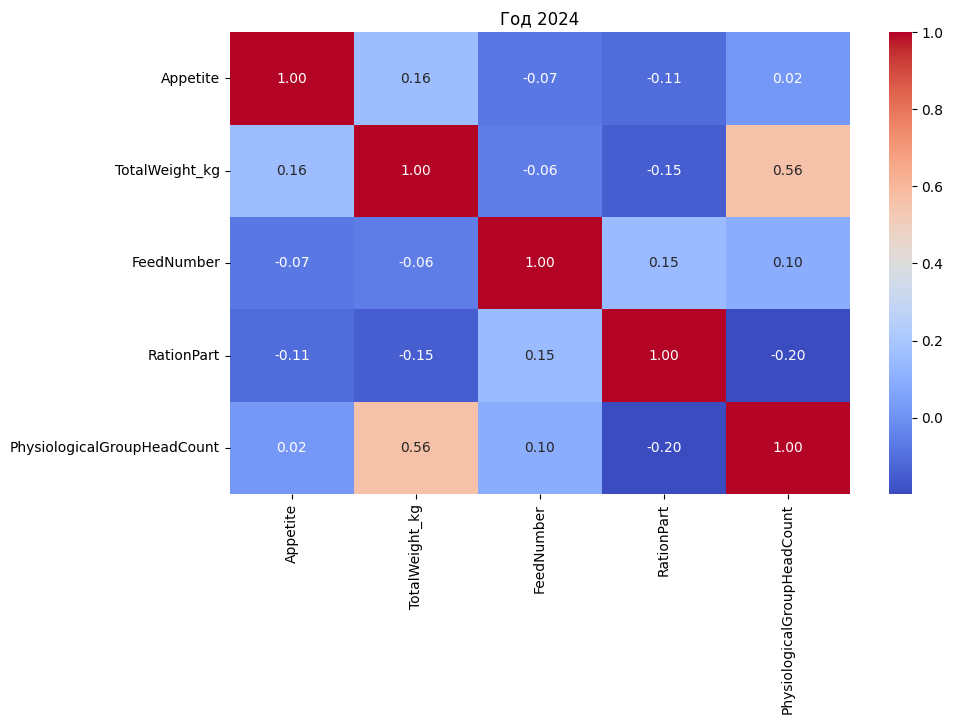

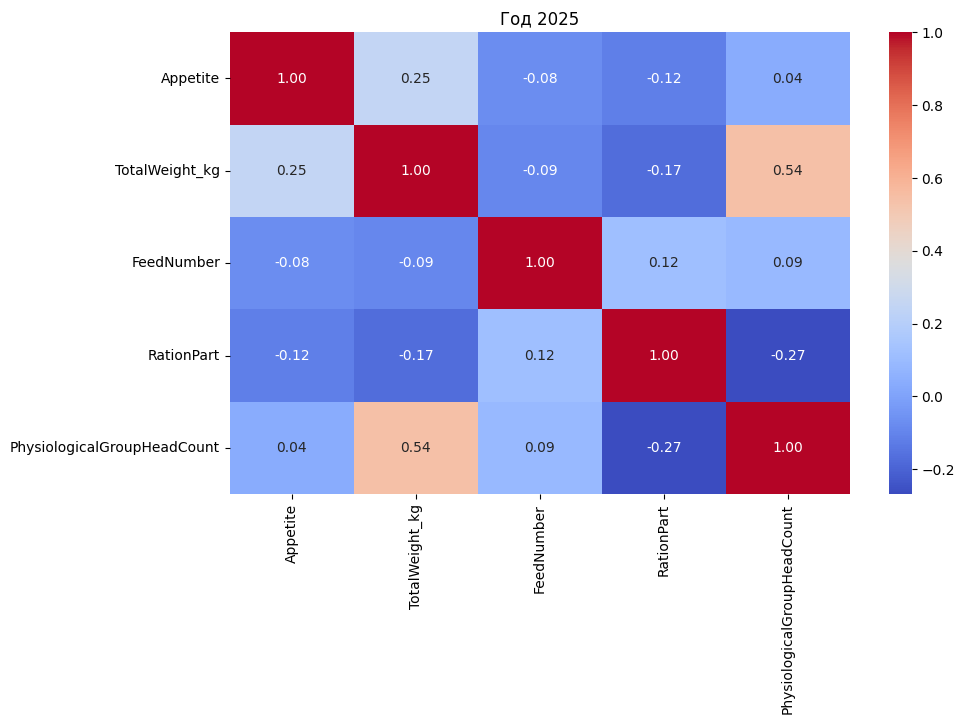

In [10]:
for i in range(2022, 2026):
    fig, axes = plt.subplots(1,1,figsize=(10,6))
    axes.set_title(f"Год {i}")
    corr = globals()[f"df_{i}"][['Appetite','TotalWeight_kg','FeedNumber', 'RationPart', 'PhysiologicalGroupHeadCount']].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

In [11]:
X = df_2022[['TotalWeight_kg','FeedNumber', 'RationPart', 'PhysiologicalGroupHeadCount']]
X = sm.add_constant(X)
y = df_2022['Appetite']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Appetite   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     675.4
Date:                Tue, 25 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:05:34   Log-Likelihood:            -5.2874e+05
No. Observations:              274479   AIC:                         1.057e+06
Df Residuals:                  274474   BIC:                         1.058e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          10.3186      0.013    787.638      0.000      10.293      10.344
TotalWeight_kg               5.144e-06   1.18e-07     43.617      0.000    4.91e-06    5.37e-06
FeedNumber                      0.0062      0.000     23.279      0.000       0.006       0.007
RationPart                     -0.0094      0.001     -6.901      0.000      -0.012      -0.007
PhysiologicalGroupHeadCount    -0.0006   3.46e-05    -16.685      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     5219.643   Durbin-Watson:                   1.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10538.004
Skew:                          -0.084   Prob(JB):                         0.00
Kurtosis:                       3.945   Cond. No.                     2.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""